### LDA with SkLearn

```
File Name: LDA_SkLearn_v1
Date: 5-Jul-2018
Version: v1
Description: Copied from PCA code, modify to use LDA for the music data
```

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Override this data with music data

In [2]:
fileNameNoPrefix = "LibrosaReduced120Sec577FeatsCSVExtract_0_1_20_v1"
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [3]:
x_data = df.drop('label',axis=1)
y_data = df['label'].values

In [4]:
x_data.columns

Index(['f15', 'f22', 'f35', 'f50', 'f171', 'f172', 'f173', 'f174', 'f181',
       'f182', 'f183', 'f188', 'f191', 'f198'],
      dtype='object')

```
#########################
#
# Perform LDA on the data
#
#########################
# First center and scale the data
```

In [5]:
# scaled_data = preprocessing.scale(data.T)
X_scaled_data = preprocessing.scale(x_data)

In [6]:
lda = LDA()

In [7]:
X_lda_data = lda.fit_transform(X=X_scaled_data, y=y_data)

In [8]:
X_lda_data.shape

(206665, 1)

```
#########################
#
# Draw a scree plot and a LDA plot
#
#########################
```

```
#The following code constructs the Scree plot
```

In [9]:
per_var = np.round(lda.explained_variance_ratio_ * 100, decimals=1)

In [10]:
len(per_var)

1

In [11]:
per_var

array([100.])

In [12]:
labels = ['LDA' + str(x) for x in range(1,len(per_var)+1)]

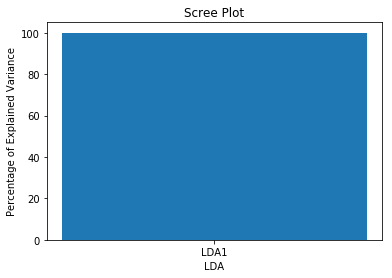

In [13]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('LDA')
plt.title('Scree Plot')
plt.show()

```
#the following code makes a fancy looking plot using PC1
```

In [14]:
# pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
lda_df = pd.DataFrame(X_lda_data, columns=x_data.columns)

ValueError: Shape of passed values is (1, 206665), indices imply (14, 206665)

In [ ]:
plt.scatter(pca_df.f0, pca_df.f1)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.f0.loc[sample], pca_df.f1.loc[sample]))
    
plt.show()

In [ ]:
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(lda.components_[0]) # , index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 20 genes
top_10_genes = sorted_loading_scores[0:20].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])
# <span_id="mce_SELREST_start", style="overflow:hidden;line-height:0;"></span>)